In [1]:
#Import Dependencies
import requests
import pprint
import pandas as pd


In [2]:
#Read Formatted Hurricane CSV
#0,AL021851,1851,UNNAMED,0,0 (,Code,Year,Name,Landfall Counts,Max Category Rating)
form_hurdat = pd.read_csv('Datasets/FormattedHurricaneData.csv')

#Read Temperature Anomaly CSV
#1851,0.00 (Year,Anomaly)
temp_anodat = pd.read_csv('Datasets/TempAnomalyData.csv')

In [3]:
#Merge CSV to include all hurricane and temperature data
perfect_storm = pd.merge(form_hurdat, temp_anodat, how = "left", on=["Year", "Year"])
perfect_storm

,Unnamed: 0,Code,Year,Name,Landfall Counts,Max Category Rating,Anomaly
0,0,AL021851,1851,UNNAMED,0,0,0.00
1,1,AL031851,1851,UNNAMED,0,0,0.00
2,2,AL041851,1851,UNNAMED,1,3,0.00
3,3,AL051851,1851,UNNAMED,0,0,0.00
4,4,AL061851,1851,UNNAMED,1,0,0.00
...,...,...,...,...,...,...,...
1946,1946,AL132022,2022,JULIA,4,1,0.67
1947,1947,AL142022,2022,KARL,0,0,0.67
1948,1948,AL152022,2022,LISA,1,1,0.67
1949,1949,AL162022,2022,MARTIN,0,1,0.67


In [4]:
perfect_storm.drop('Unnamed: 0', axis = 1, inplace = True)
perfect_storm

,Code,Year,Name,Landfall Counts,Max Category Rating,Anomaly
0,AL021851,1851,UNNAMED,0,0,0.00
1,AL031851,1851,UNNAMED,0,0,0.00
2,AL041851,1851,UNNAMED,1,3,0.00
3,AL051851,1851,UNNAMED,0,0,0.00
4,AL061851,1851,UNNAMED,1,0,0.00
...,...,...,...,...,...,...
1946,AL132022,2022,JULIA,4,1,0.67
1947,AL142022,2022,KARL,0,0,0.67
1948,AL152022,2022,LISA,1,1,0.67
1949,AL162022,2022,MARTIN,0,1,0.67


In [5]:
# Save as CSV
perfect_storm.to_csv('Datasets/PerfectStorm.csv', sep=',', index=False, encoding='utf-8')

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [7]:
# Limit data set from 1991 to 2020
# data[(data["pmra"] >= -2.6) & (data["pmra"] <= -2)]

filteredstorm=perfect_storm[(perfect_storm["Year"] >= 1991) & (perfect_storm["Year"] < 2021)]
filteredstorm

,Code,Year,Name,Landfall Counts,Max Category Rating,Anomaly
1427,AL011991,1991,ANA,0,0,0.34
1428,AL021991,1991,UNNAMED,0,0,0.34
1429,AL031991,1991,BOB,3,3,0.34
1430,AL041991,1991,UNNAMED,0,0,0.34
1431,AL051991,1991,UNNAMED,0,0,0.34
...,...,...,...,...,...,...
1909,AL272020,2020,EPSILON,0,3,0.72
1910,AL282020,2020,ZETA,2,3,0.72
1911,AL292020,2020,ETA,4,4,0.72
1912,AL302020,2020,THETA,0,0,0.72


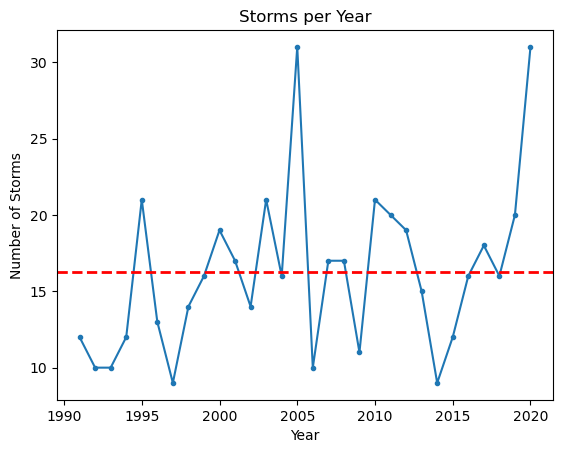

In [8]:
# DataFrame.plot.line(x=None, y=None, **kwargs)

freqline=filteredstorm.groupby('Year')['Code'].count().plot(title='Storms per Year', ylabel='Number of Storms', style='.-');

# Save the figure
fig = freqline.get_figure()
plt.axhline(y=np.nanmean(filteredstorm.groupby('Year')['Code'].count()), color='red', linestyle='--', linewidth=2, label='Avg')
fig.savefig("Visualizations/stormfreq.png")

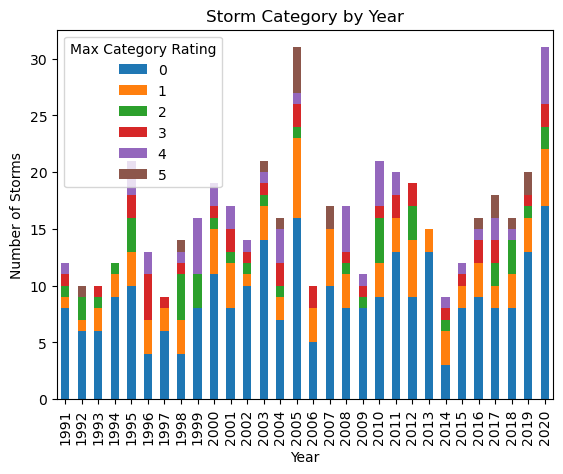

In [9]:
# df.groupby(['var1', 'var2']).size().unstack().plot(kind='bar', stacked=True)

catbar=filteredstorm.groupby(['Year', 'Max Category Rating']).size().unstack().plot(kind='bar', stacked=True, ylabel='Number of Storms', title='Storm Category by Year');

# Save the figure
fig = catbar.get_figure()
fig.savefig("Visualizations/stormcat.png")

In [10]:
# Modified for Landfall check yes or no

landfall = []
for index, row in perfect_storm.iterrows():
    if row['Landfall Counts'] != 0:
        landfall.append('Yes')
    else:
        landfall.append('No')
perfect_storm['Landfall'] = landfall
perfect_storm

,Code,Year,Name,Landfall Counts,Max Category Rating,Anomaly,Landfall
0,AL021851,1851,UNNAMED,0,0,0.00,No
1,AL031851,1851,UNNAMED,0,0,0.00,No
2,AL041851,1851,UNNAMED,1,3,0.00,Yes
3,AL051851,1851,UNNAMED,0,0,0.00,No
4,AL061851,1851,UNNAMED,1,0,0.00,Yes
...,...,...,...,...,...,...,...
1946,AL132022,2022,JULIA,4,1,0.67,Yes
1947,AL142022,2022,KARL,0,0,0.67,No
1948,AL152022,2022,LISA,1,1,0.67,Yes
1949,AL162022,2022,MARTIN,0,1,0.67,No


In [11]:
# Limit data set from 1991 to 2020
# data[(data["pmra"] >= -2.6) & (data["pmra"] <= -2)]

filteredstorm2=perfect_storm[(perfect_storm["Year"] >= 1991) & (perfect_storm["Year"] < 2021)]
filteredstorm2

,Code,Year,Name,Landfall Counts,Max Category Rating,Anomaly,Landfall
1427,AL011991,1991,ANA,0,0,0.34,No
1428,AL021991,1991,UNNAMED,0,0,0.34,No
1429,AL031991,1991,BOB,3,3,0.34,Yes
1430,AL041991,1991,UNNAMED,0,0,0.34,No
1431,AL051991,1991,UNNAMED,0,0,0.34,No
...,...,...,...,...,...,...,...
1909,AL272020,2020,EPSILON,0,3,0.72,No
1910,AL282020,2020,ZETA,2,3,0.72,Yes
1911,AL292020,2020,ETA,4,4,0.72,Yes
1912,AL302020,2020,THETA,0,0,0.72,No


In [50]:
filteredstormyes = filteredstorm2[filteredstorm2.Landfall == 'Yes']
filteredstormno = filteredstorm2[filteredstorm2.Landfall == 'No']
filteredstormyes = filteredstormyes.groupby('Year')['Landfall'].count()
filteredstormno = filteredstormno.groupby('Year')['Landfall'].count()
filteredstormtotal = filteredstormyes + filteredstormno 
filteredstormpercentage = filteredstormyes/filteredstormtotal *100
filteredstormpercentage = pd.DataFrame(filteredstormpercentage.agg(['mean', 'median', 'var', 'std', 'sem']))
filteredstormpercentage

,Landfall
mean,44.989368
median,48.809524
var,247.884310
std,15.744342
sem,2.874510


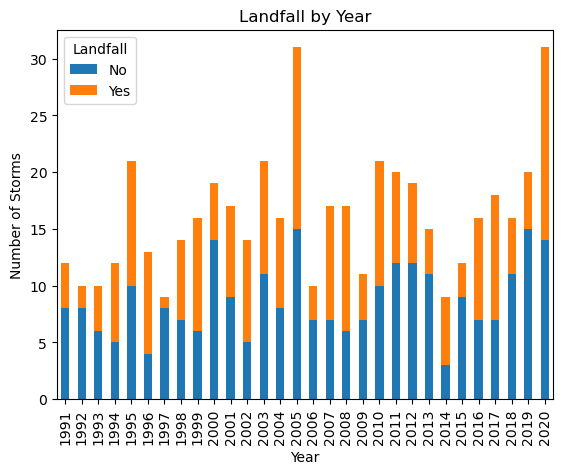

In [12]:
# stacked bar chart of landfall vs. non-landfall storms

filteredstorm2.groupby(['Year', 'Landfall']).size().unstack().plot(kind='bar', stacked=True, ylabel='Number of Storms', title='Landfall by Year');

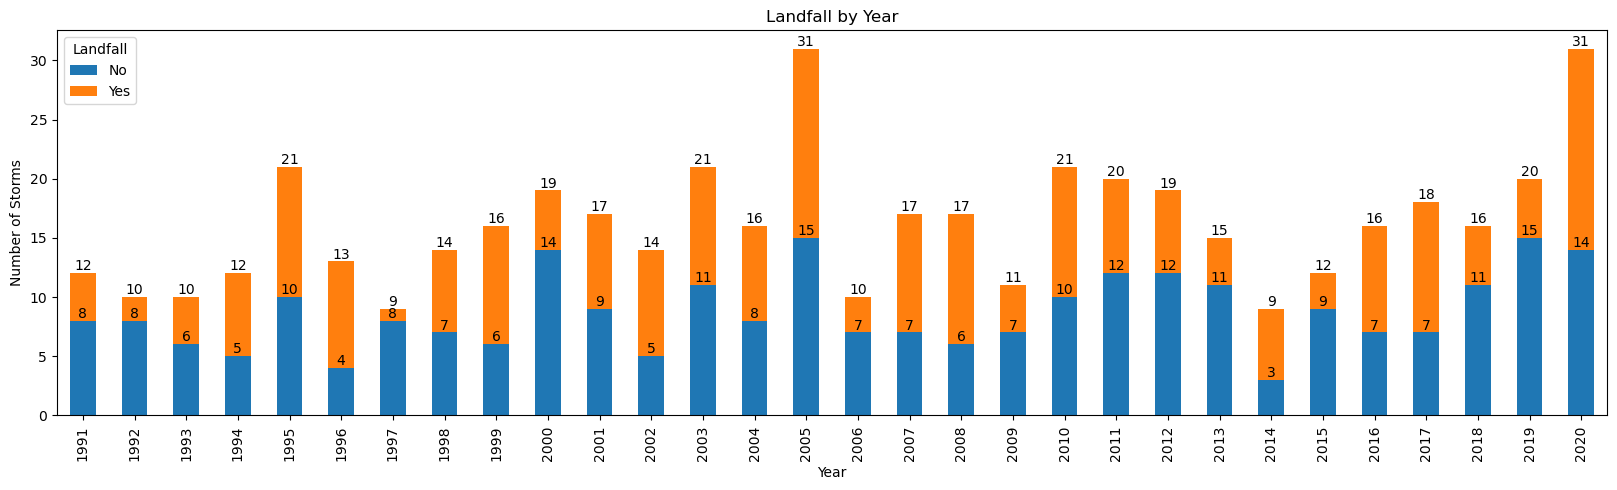

In [13]:
landstorm=filteredstorm2.groupby(['Year', 'Landfall']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5), ylabel='Number of Storms', title='Landfall by Year');
for container in landstorm.containers:
    landstorm.bar_label(container)

# Save the figure
# Save the figure
fig = landstorm.get_figure()
fig.savefig("Visualizations/landstorm.png")